# ***Neural Network*** Clasificacion con tensorflow
## Aprendizaje automático de maquina

Instalamos tensorflow, la librería a usar para crear las redes neuronales

In [9]:
#!pip install tensorflow

## Librerías

Importamos las librerías necesarias para el problema

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
import tensorflow as tf
import sklearn

from plotly.subplots import make_subplots

from tensorflow import keras

from sklearn.preprocessing import StandardScaler #preprosesamiento de datos
from sklearn.model_selection import train_test_split #entramar los datos
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix, accuracy_score, classification_report, roc_auc_score #usar las metricas de errores, para verificar que los datos estan bien

from keras import layers, models, Input

## Importar el dataset

In [11]:
data_ori = pd.read_csv('..\databases\Blood_samples_dataset_balanced_2(f).csv')
data=data_ori.copy()

## Preprocesamiento de los datos

Vemos el dataset en forma de tabla (podemos observar que la mayoría de datos están entre 0 y 1)

In [12]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [13]:
data.info() #Información de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

In [14]:
data.nunique()

Glucose                                      65
Cholesterol                                  65
Hemoglobin                                   65
Platelets                                    65
White Blood Cells                            65
Red Blood Cells                              65
Hematocrit                                   65
Mean Corpuscular Volume                      65
Mean Corpuscular Hemoglobin                  65
Mean Corpuscular Hemoglobin Concentration    65
Insulin                                      65
BMI                                          65
Systolic Blood Pressure                      65
Diastolic Blood Pressure                     65
Triglycerides                                65
HbA1c                                        65
LDL Cholesterol                              65
HDL Cholesterol                              65
ALT                                          65
AST                                          65
Heart Rate                              

Después de este comando podemos ver que hay 5 tipos de "disease", por lo que nuestro problema será una clasificación múltiple.

In [15]:
print(data.isnull().sum(), '\n') #Revisar la cantidad de datos nulos 

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

### Como no hay datos nulos, podemos seguir sin tener que eliminar nada.

In [16]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'],
      dtype=object)

In [17]:
data['Disease'] = data['Disease'].replace({'Healthy': 0, 'Diabetes': 1, 'Thalasse' : 2, 'Anemia' : 3, 'Thromboc': 4}).astype(int)

C:\Users\Samuel\AppData\Local\Temp\ipykernel_17136\4077891876.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Disease'] = data['Disease'].replace({'Healthy': 0, 'Diabetes': 1, 'Thalasse' : 2, 'Anemia' : 3, 'Thromboc': 4}).astype(int)


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2351 entries, 0 to 2350
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2351 non-null   float64
 1   Cholesterol                                2351 non-null   float64
 2   Hemoglobin                                 2351 non-null   float64
 3   Platelets                                  2351 non-null   float64
 4   White Blood Cells                          2351 non-null   float64
 5   Red Blood Cells                            2351 non-null   float64
 6   Hematocrit                                 2351 non-null   float64
 7   Mean Corpuscular Volume                    2351 non-null   float64
 8   Mean Corpuscular Hemoglobin                2351 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2351 non-null   float64
 10  Insulin                 

### Dado que nuestros valores de la columna de clasificación son categóricos, los pasamos a números.

## Insights

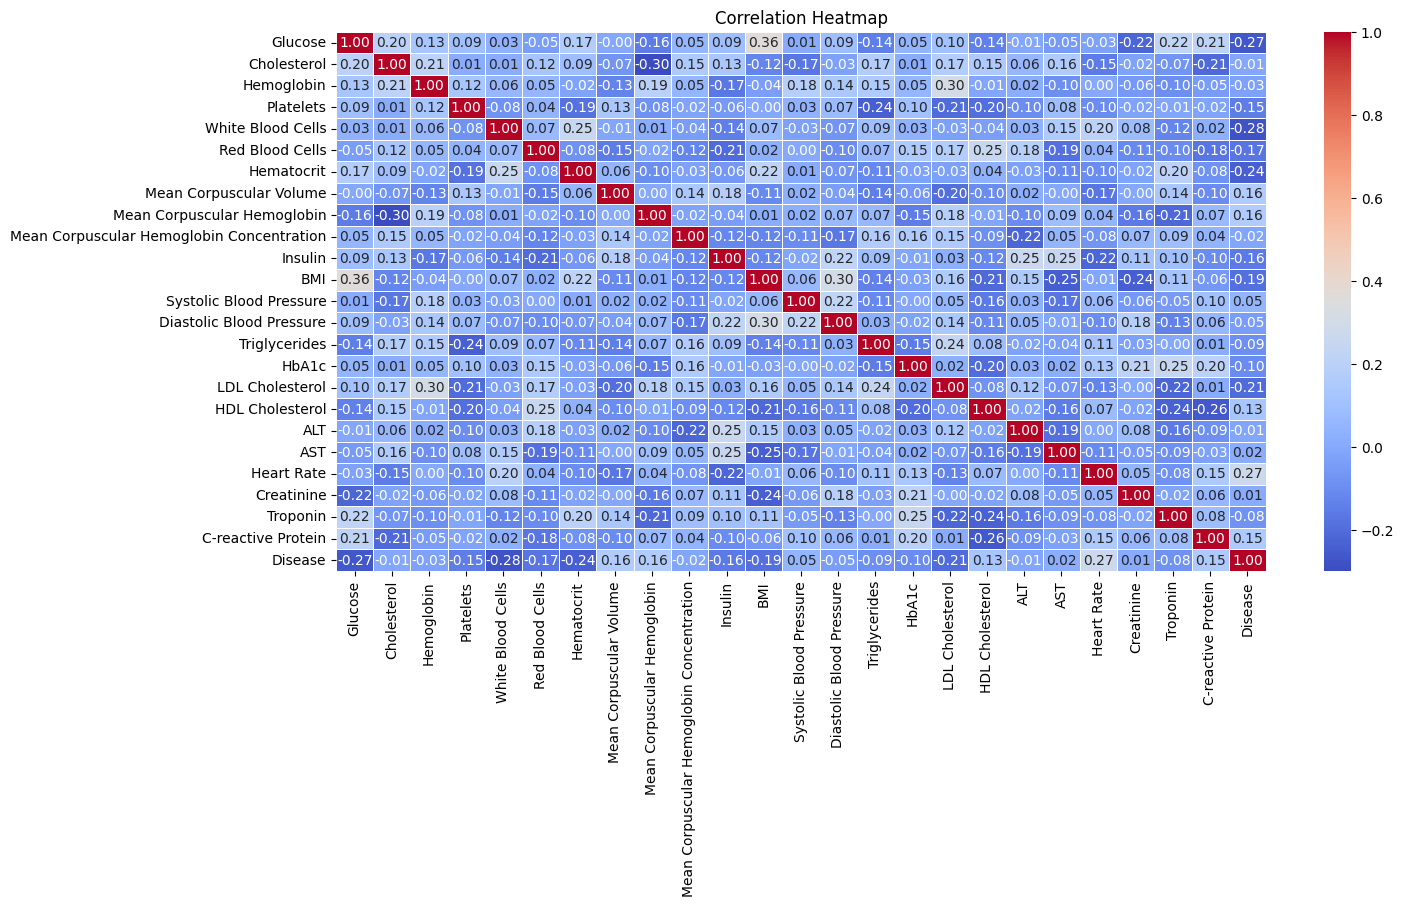

In [19]:
#Visualización de la matriz de correlación
correlation_matrix = data.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Como no tenemos correlación fuerte entre ningún par de variables, no podemos decir nada significativo sobre el dataset, por lo que procedemos con otros tipos de gráficas.

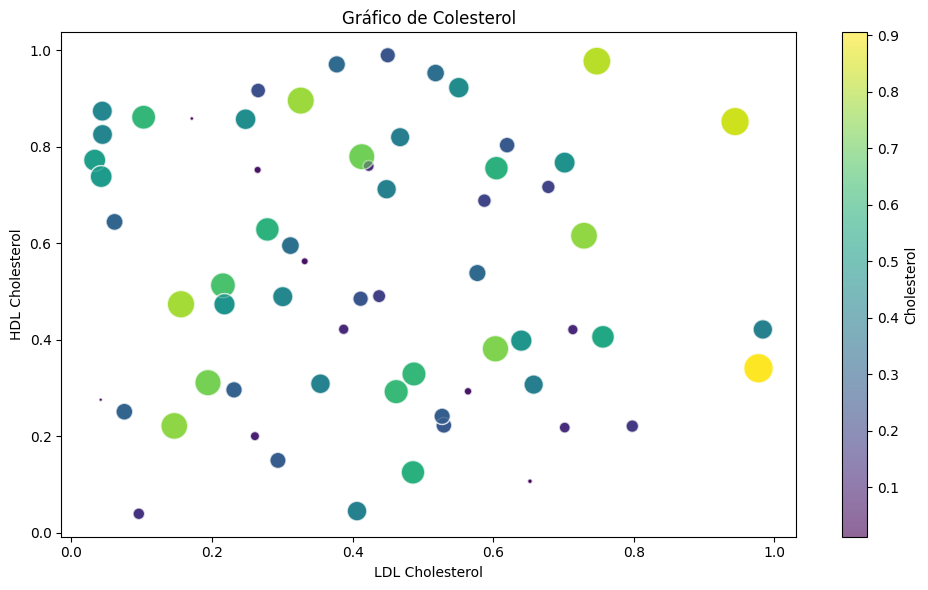

In [31]:
plt.figure(figsize=(10, 6))

# Crear scatter plot con tamaño proporcional al colesterol
scatter = plt.scatter(
    data['LDL Cholesterol'],
    data['HDL Cholesterol'],
    s=data['Cholesterol']*500,  # tamaño de puntos, por 500 ya que los valores son muy pequeños
    c=data['Cholesterol'],      # color de puntos
    cmap='viridis',             # puedes cambiar el mapa de color
    alpha=0.6,
    edgecolors='w'
)

# Agregar título y etiquetas
plt.title('Gráfico de Colesterol')
plt.xlabel('LDL Cholesterol')
plt.ylabel('HDL Cholesterol')

# Agregar barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Cholesterol')

# Mostrar gráfico
plt.tight_layout()
plt.show()

Con este gráfico podemos ver que hay una mayoría con niveles bajos de colesterol, sumado a poca concentración en niveles altos de LDL, que es el llamado colesterol "malo", por tanto, esta medida nos dice que no hay tanta gente mal de su colesterol, por lo que no es una variable por la que debamos preocuparnos respecto a enfermedades.

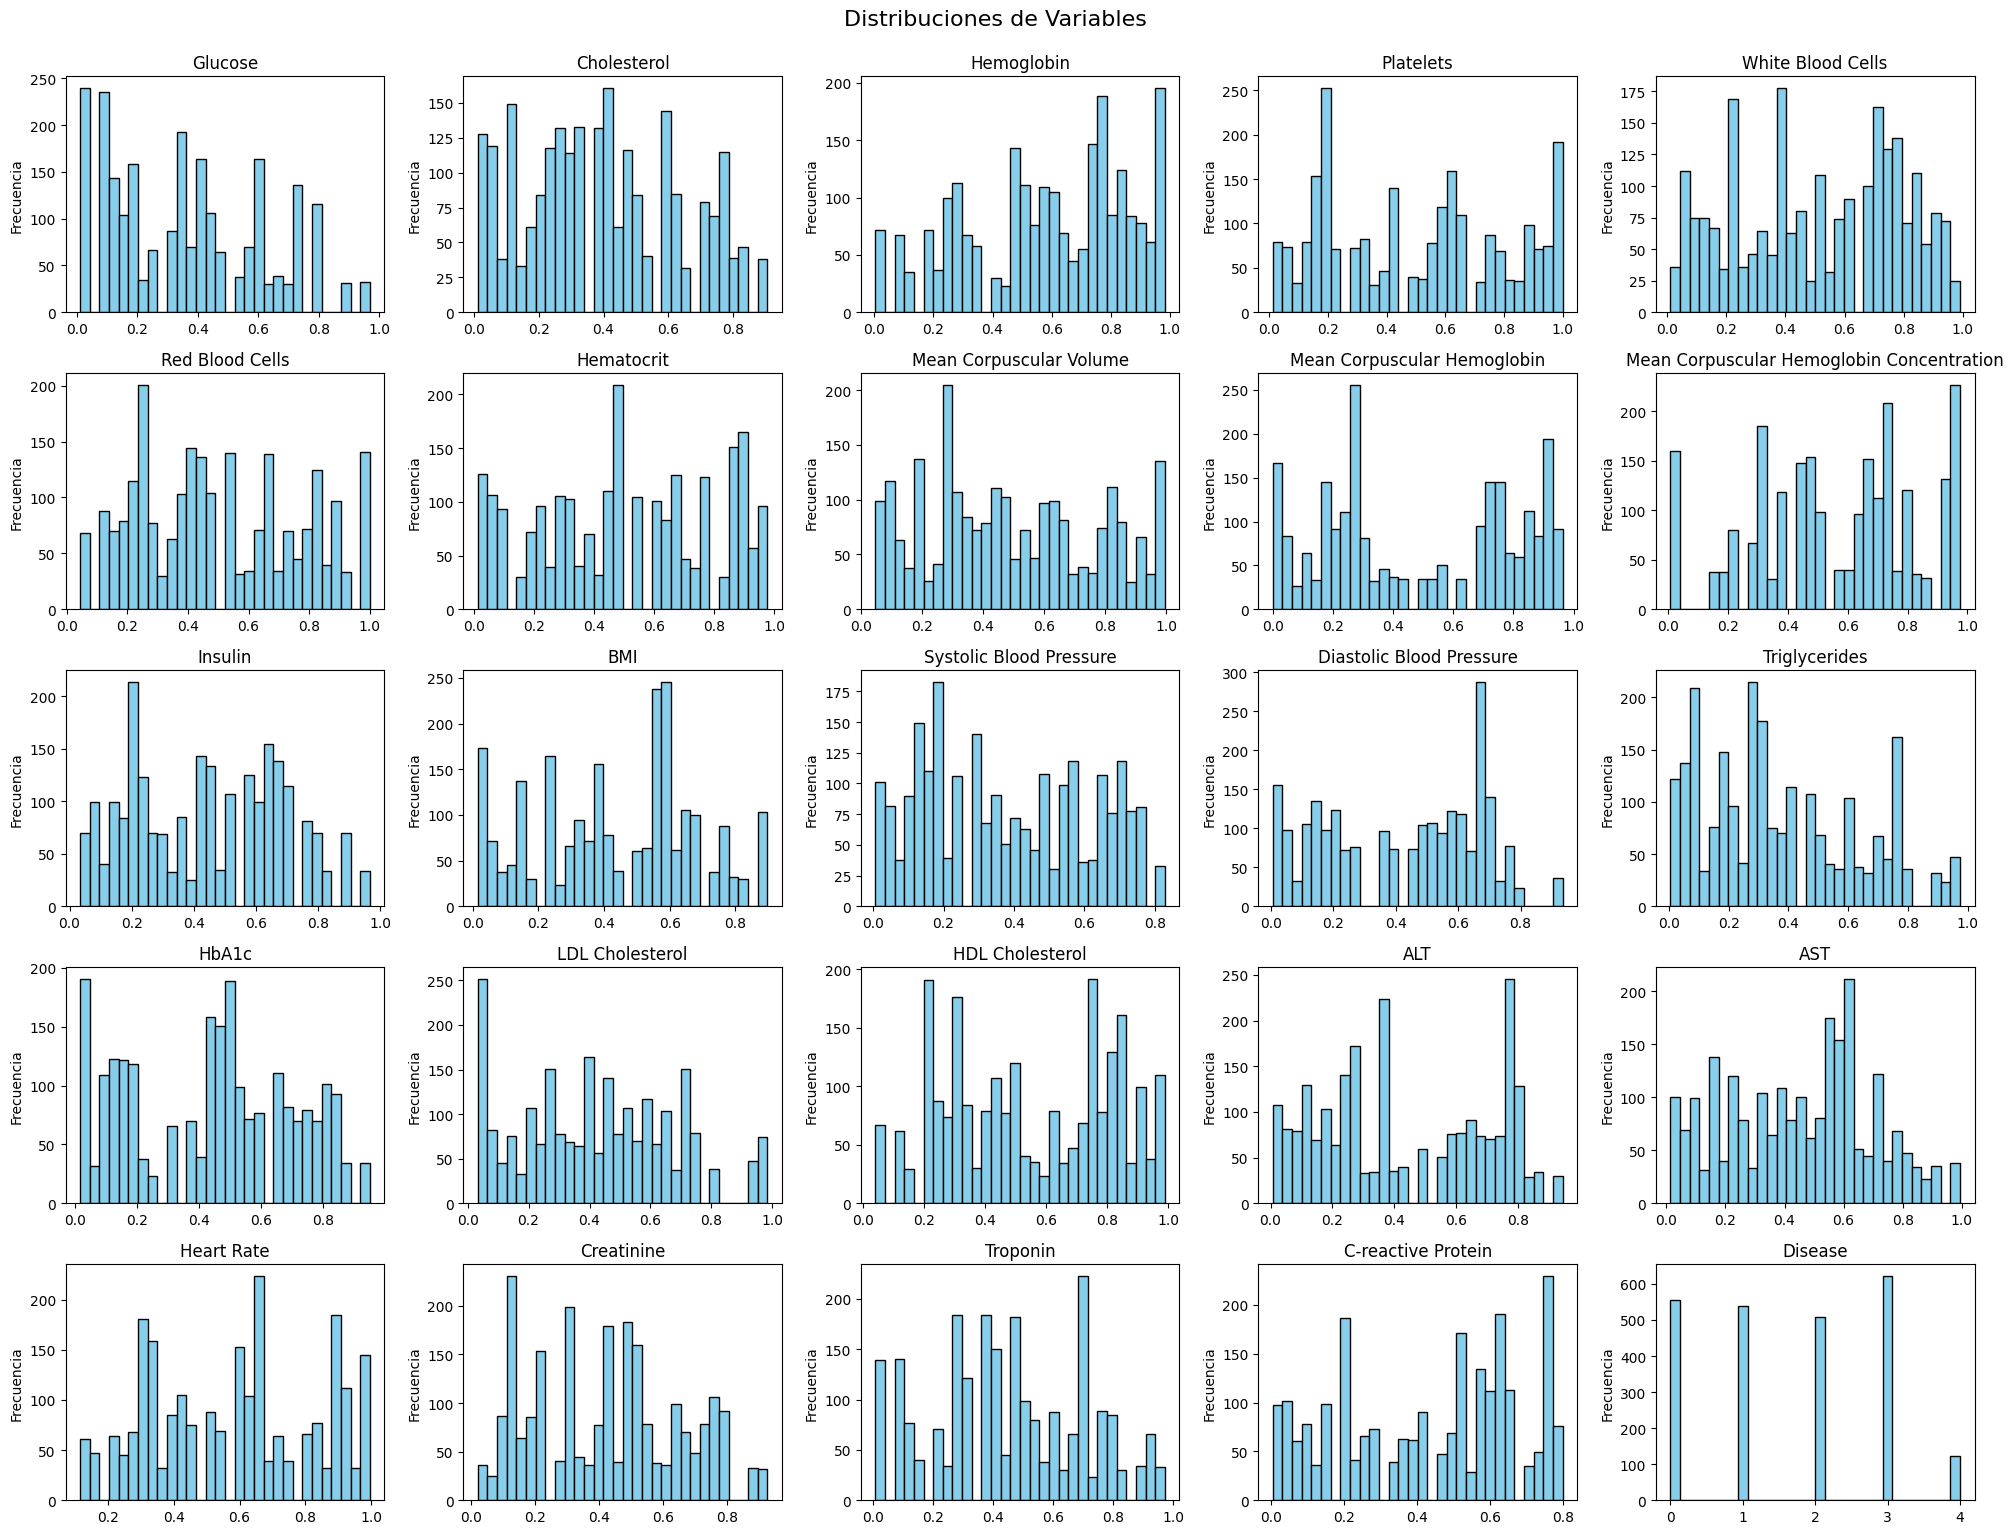

In [32]:
num_columns = 5
num_vars = len(data.columns)
num_rows = int(num_vars / num_columns)

# Crear subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, num_rows * 3))
axes = axes.flatten()  # para iterar más fácil

# Crear histogramas por columna
for i, column in enumerate(data.columns):
    axes[i].hist(data[column].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(column)
    axes[i].set_ylabel('Frecuencia')

# Eliminar subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar diseño
plt.tight_layout()
plt.suptitle('Distribuciones de Variables', fontsize=16, y=1.02)
plt.show()

Con estas frecuencias podemos ver que en la hemoglobina, hay muy poca gente con niveles bajos de ella (teniendo en cuenta que en el diccionario dado por el dataset los datos están entre 13.5 y 17.5 g/dL, y niveles bajos se consideran por debajo de 13), entonces podemos pensar que habrá poca gente con Talasemia, una enfermedad relacionada con déficit de hemoglobina. Además, como el nivel de glóbulos rojos en sangre es aparentemente uniforme para todos los valores, podemos esperar tanto gente sana como anémica. Por último, como hay mucha gente con bajos niveles de glucosa, podemos esperar resultados no tan altos de diabetes.

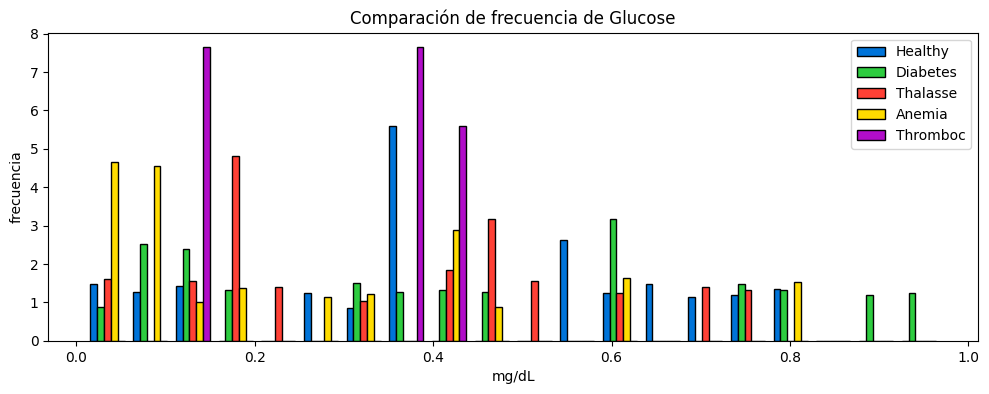

In [ ]:
#Comparar la frecuencia de número de reviews comparando si el host tiene su perfil verificado o no
plt.figure(figsize=(12, 4))

x=[data[data['Disease']==0]['Glucose'], data[data['Disease']==1]['Glucose'], data[data['Disease']==2]['Glucose'], data[data['Disease']==3]['Glucose'], data[data['Disease']==4]['Glucose']]

n, bins, patches=plt.hist(x, bins=20, density = True, histtype = "bar", color=['#0074D9', '#2ECC40', '#FF4136', '#FFDC00', '#B10DC9'], edgecolor = 'Black', label=['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc'])
plt.legend(prop={'size': 10})
sigma1 = x[0].std()
mu1    = x[0].mean()

plt.title(f'Comparación de frecuencia de Glucose')
plt.ylabel('frecuencia')
plt.xlabel(f'mg/dL')


plt.show()

Para esta gráfica que relaciona la frecuencia de la glucosa con la "disease" que tiene la persona, vemos que la gente con diabetes tiene tanto niveles altos como bajos de ella, por lo que no podemos fiarnos de esta medida para predecir dicha enfermedad, además vemos que la gente saludable se agrupa más en niveles bajos de glucosa, por lo que puede ser una señal de que es mejor tener bajo esta caracteristica. 

## Preparación de datos

In [34]:
X = data.drop(['Disease',
              'LDL Cholesterol',
              'HDL Cholesterol',
              'Mean Corpuscular Volume', 
              'Mean Corpuscular Hemoglobin',
              'Mean Corpuscular Hemoglobin Concentration'], axis=1)
y = data['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=911)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [35]:
print(X_train.shape, X_test.shape)

(1645, 19) (706, 19)


## Creación del modelo

Se diseño la siguiente red con 19 neuronas de entradas (una por cada variable), usando la función de activación Relu, posteriormente se usaron 45 neuronas en la segunda capa, en este caso con la función Softmax, esto ya que es una clasificación múltiple, luego en la tercera capa se comenzó la reducción de neuronas a 15 y con la misma función Softmax. 

Luego se pasa a la capa 5 con 10 neuronas y función Softmax y por último la capa de salida que cuenta con 5 neuronas (una por cada clase) y con la activación Softmax.

In [53]:
model = keras.models.Sequential([Input(X_train_sc.shape[1:]),
                                 keras.layers.Dense(19, activation=tf.nn.softmax),
                                 keras.layers.Dense(40, activation=tf.nn.softmax),
                                 keras.layers.Dense(15, activation=tf.nn.softmax),
                                 keras.layers.Dense(10, activation=tf.nn.softmax),
                                 keras.layers.Dense(5, activation=tf.nn.softmax)
                                 ])

In [54]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Se uso la función de perdida ‘sparse_categorical_crossentropy’ ya que es una función diseñada para las clasificaciones múltiples. Luego se entrenó la red usando 300 épocas.

In [55]:
historial = model.fit(X_train_sc, y_train, epochs=250)

Epoch 1/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2632 - loss: 1.6094
Epoch 2/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5880
Epoch 3/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5718
Epoch 4/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2632 - loss: 1.5592
Epoch 5/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5498
Epoch 6/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5423
Epoch 7/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5365
Epoch 8/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5319
Epoch 9/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5280
Epoch 10/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2632 - loss: 1.5245
Epoch 11/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2632 - loss: 1.5204
Epoch 12/250
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

In [56]:
model.evaluate(X_test_sc, y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7705 - loss: 0.3698


[0.36982667446136475, 0.7705382704734802]

## Reporte del modelo

El modelo devulve un vector de 5 componentes donde cada una es la probabilidad de ser da dicha categoria, es decir, la componente 1 indica que tan probable es que sea de la categoria 1.

Por lo que vamos a pasar de vectores a los valores categoricos.

In [57]:
y_pred=model.predict(X_test_sc)
y_pred_bi = []

for i in y_pred:
    for j in range(len(i)):
        if i[j] == max(i):
            y_pred_bi.append(j)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [58]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 19)             │           380 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 40)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 15)             │           615 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,032 (23.57 KB)

 Trainable params: 2,010 (7.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,022 (15.71 KB)

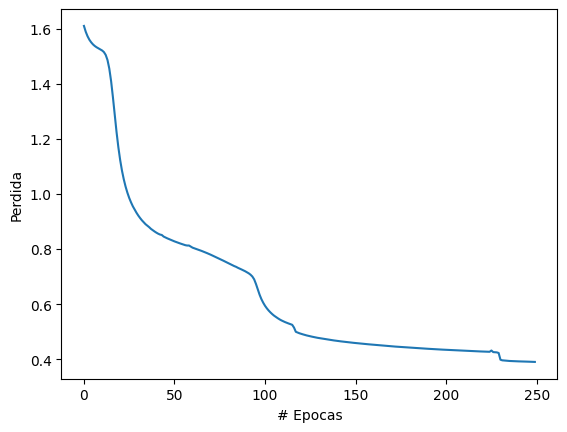

In [59]:
plt.xlabel("# Epocas")
plt.ylabel("Perdida")
plt.plot(historial.history["loss"])
plt.show()

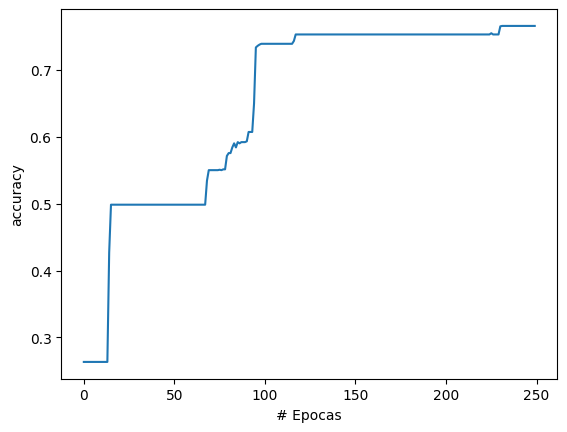

In [60]:
plt.xlabel("# Epocas")
plt.ylabel("accuracy")
plt.plot(historial.history["accuracy"])
plt.show()

In [61]:
(y_pred_bi - y_test).unique()

array([ 0, -1,  3])

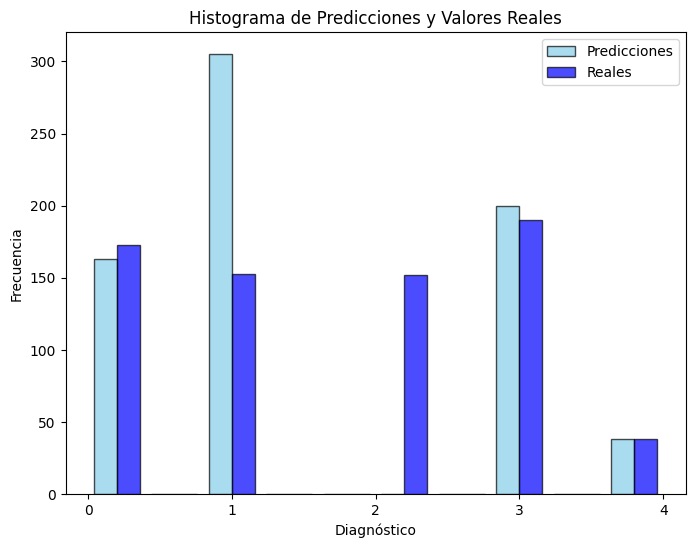

In [62]:
plt.figure(figsize=(8, 6))
plt.hist([y_pred_bi, y_test], color=['skyblue', 'blue'], edgecolor='black', alpha=0.7, label=['Predicciones', 'Reales'])
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.title('Histograma de Predicciones y Valores Reales')
plt.legend()
plt.xticks([0, 1, 2, 3, 4])
plt.show()

Text(0.5, 1.0, 'Matriz de confusión')

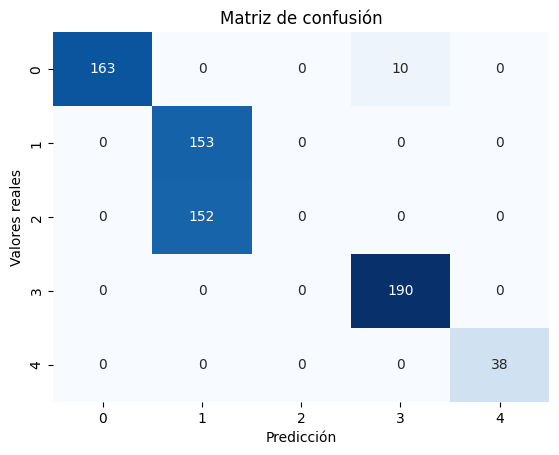

In [63]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_bi)

# Crear el gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valores reales')
plt.title('Matriz de confusión')

Viendo los resultados dados por la red después del entrenamiento y comparando la predicción con los valores reales, se puede ver que el modelo es muy bueno haciendo predicciones para las ultimas tres enfermedades, pero tiene grandes problemas a la hora de discriminar entre la primera y tercera, dando predicciones de la segunda enfermedad. Esto se debe a que la base de datos esta desbalanceada y tiene memos datos de las sanos y diabéticos, por lo que se presenta una gran confusión en la clasificación de estos. 

Además, los niveles dados por el dataset son estables, por tanto el análisis puede estar sesgado o decirnos que gente con niveles sanos puede poseer también ciertas enfermedades.